In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### read data

In [47]:
data=pd.read_csv(r"C:\Users\ROG\Downloads\archive (2)\train.csv")
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

#### Find missing values

In [4]:
data.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [5]:
data[data['Postal Code'].isnull()] # find out where the missing values are

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Seems like the data collector did not have the postal code for Burlington,Vermont. From a quick google search the postal code for East Burlington Vermont is 05401. So we will replace the null values with the zipcode

In [6]:
data.fillna({'Postal Code':'05401.0'}, inplace=True)
# convert the data type for postal code to a string so that we can compute the zipcode 05401

In [7]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [8]:
data[(data['City']=='Burlington')&(data['State']=='Vermont')].head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,05401.0,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,05401.0,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20


In [10]:
data['Order Date']=pd.to_datetime(data['Order Date'], format='mixed')
data['Ship Date']=pd.to_datetime(data['Ship Date'], format='mixed')

In [11]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [12]:
data.describe()  #get a statistical description of the dataset

,Row ID,Order Date,Ship Date,Sales
count,9800.000000,9800,9800,9800.000000
mean,4900.500000,2017-04-12 14:24:35.265306368,2017-04-21 19:45:12.489796096,230.769059
min,1.000000,2015-01-02 00:00:00,2015-01-04 00:00:00,0.444000
25%,2450.750000,2016-05-02 12:00:00,2016-05-08 00:00:00,17.248000
50%,4900.500000,2017-05-30 00:00:00,2017-06-12 00:00:00,54.490000
75%,7350.250000,2018-04-11 00:00:00,2018-05-02 00:00:00,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-05-01 00:00:00,22638.480000
std,2829.160653,NaN,NaN,626.651875


lets take a look at the lowest priced item that cost $0.44

In [13]:
data[data['Sales']==0.444]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4101,4102,US-2018-102288,2018-06-19,2018-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,Texas,77095.0,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444


I think the difference between the maximum and minimum sales is pretty large. And this Hoover Replacemnt belt's price is pretty low. So let's take a look at the products with high and low selling prices.

In [14]:
data.sort_values(by='Sales', ascending= True).head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4101,4102,US-2018-102288,2018-06-19,2018-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,Texas,77095.0,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444
9292,9293,CA-2018-124114,2018-02-03,2018-02-03,Same Day,RS-19765,Roland Schwarz,Corporate,United States,Waco,Texas,76706.0,Central,OFF-BI-10004022,Office Supplies,Binders,Acco Suede Grain Vinyl Round Ring Binder,0.556
8658,8659,CA-2017-168361,2017-06-21,2017-06-25,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Chicago,Illinois,60623.0,Central,OFF-BI-10003727,Office Supplies,Binders,Avery Durable Slant Ring Binders With Label Ho...,0.836
4711,4712,CA-2015-112403,2015-03-31,2015-03-31,Same Day,JO-15280,Jas O'Carroll,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,OFF-BI-10003529,Office Supplies,Binders,Avery Round Ring Poly Binders,0.852
2106,2107,US-2015-152723,2015-09-26,2015-09-26,Same Day,HG-14965,Henry Goldwyn,Corporate,United States,Mesquite,Texas,75150.0,Central,OFF-BI-10003460,Office Supplies,Binders,Acco 3-Hole Punch,0.876


In [15]:
data.sort_values(by='Sales', ascending= True).tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
4190,4191,CA-2018-166709,2018-11-17,2018-11-22,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,10499.970
2623,2624,CA-2018-127180,2018-10-22,2018-10-24,First Class,TA-21385,Tom Ashbrook,Home Office,United States,New York City,New York,10024.0,East,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,11199.968
8153,8154,CA-2018-140151,2018-03-23,2018-03-25,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115.0,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.960
6826,6827,CA-2017-118689,2017-02-10,2017-09-10,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905.0,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950
2697,2698,CA-2015-145317,2015-03-18,2015-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216.0,South,TEC-MA-10002412,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.480


Okay, guess it makes sense that office supplies like binders would go for far lower prices as compared to machinery. The Hoover replacement belt still seems under priced so we will check if there are other hoover appliance belts that were sold and their prices.

In [16]:
data[data['Product Name'].str.contains('Hoover Replacement Belt for Commercial Guardsm')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
1725,1726,CA-2016-127453,2016-12-19,2016-12-20,First Class,JK-15370,Jay Kimmel,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,3.552
4101,4102,US-2018-102288,2018-06-19,2018-06-23,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,United States,Houston,Texas,77095.0,Central,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444
8450,8451,CA-2018-125451,2018-10-23,2018-10-24,First Class,AH-10075,Adam Hart,Corporate,United States,Cranston,Rhode Island,2920.0,East,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,2.220
8703,8704,CA-2016-133494,2016-01-03,2016-05-03,Standard Class,RP-19390,Resi Pölking,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,3.552


This particular hoover replacement belt is very cheap compared to the rest but it is the only one from Texas, Houston so we will assume there was a clearance sale or something of that sort. However lets see how the other products from Texas fare generally. We will compare it to Pennsylvania, Philadelphia where the other two Hoover replacement belts were sold.

In [17]:
data[data['City']=='Houston'].shape

(374, 18)

In [18]:
city_sales_count=data.groupby('City').Sales.count().reset_index().sort_values(by='Sales',ascending=False)
#find how many items were sold in each city


In [19]:
city_sales_count[city_sales_count['City']=='Philadelphia'] #find number of products sold in Philadelphia

,City,Sales
372,Philadelphia,532


In [20]:
city_sales_count[city_sales_count['City']=='Houston'] #find number of products sold in Houston  

,City,Sales
207,Houston,374


In [21]:
city_s=data.groupby('City').Sales.sum().reset_index().sort_values(by='Sales',ascending=False)
#find out how much was made in sales in each city

In [22]:
city_s[city_s['City']=='Philadelphia']

,City,Sales
372,Philadelphia,108841.749


In [23]:
city_s[city_s['City']=='Houston']

,City,Sales
207,Houston,63956.1428


In [24]:
P_products= set(data[data['City']=='Philadelphia']['Product ID'])
H_products= set(data[data['City']=='Houston']['Product ID'])
                 
common_products= P_products.intersection(H_products)
                  
result_data=data[data['Product ID'].isin(common_products)&((data['City']=='Houston')|(data['City']=='Philadelphia'))].sort_values(by='Product ID')
                 
result_to_plot=result_data.head(30)
result_to_plot

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9219,9220,US-2016-164238,2016-08-16,2016-08-20,Standard Class,JW-15955,Joni Wasserman,Consumer,United States,Philadelphia,Pennsylvania,19120.0,East,FUR-BO-10000780,Furniture,Bookcases,O'Sullivan Plantations 2-Door Library in Landv...,301.4700
4266,4267,US-2017-131611,2017-05-11,2017-09-11,Standard Class,EP-13915,Emily Phan,Consumer,United States,Houston,Texas,77036.0,Central,FUR-BO-10000780,Furniture,Bookcases,O'Sullivan Plantations 2-Door Library in Landv...,956.6648
7554,7555,CA-2015-114181,2015-10-05,2015-05-14,Second Class,AF-10885,Art Foster,Consumer,United States,Philadelphia,Pennsylvania,19134.0,East,FUR-BO-10004467,Furniture,Bookcases,Bestar Classic Bookcase,349.9650
5554,5555,US-2015-159618,2015-12-11,2015-11-16,Standard Class,DB-12970,Darren Budd,Corporate,United States,Houston,Texas,77036.0,Central,FUR-BO-10004467,Furniture,Bookcases,Bestar Classic Bookcase,67.9932
399,400,CA-2017-108987,2017-08-09,2017-10-09,Second Class,AG-10675,Anna Gayman,Consumer,United States,Houston,Texas,77036.0,Central,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",2396.2656
27,28,US-2016-150630,2016-09-17,2016-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140.0,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300
7591,7592,CA-2017-158778,2017-05-09,2017-09-09,Standard Class,DB-13210,Dean Braden,Consumer,United States,Philadelphia,Pennsylvania,19134.0,East,FUR-CH-10001146,Furniture,Chairs,"Global Task Chair, Black",71.2460
7425,7426,CA-2017-101693,2017-06-25,2017-06-27,Second Class,LC-17140,Logan Currie,Consumer,United States,Houston,Texas,77070.0,Central,FUR-CH-10001146,Furniture,Chairs,"Global Value Mid-Back Manager's Chair, Gray",85.2460
8382,8383,CA-2017-163048,2017-08-02,2017-02-15,Standard Class,MH-17440,Mark Haberlin,Corporate,United States,Houston,Texas,77036.0,Central,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,241.5000
8542,8543,CA-2016-157287,2016-12-22,2016-12-23,First Class,HR-14830,Harold Ryan,Corporate,United States,Philadelphia,Pennsylvania,19140.0,East,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,422.6250


In [25]:
result_to_plot['Product Name'].nunique() #find the number of unique products in result_to_plot

14

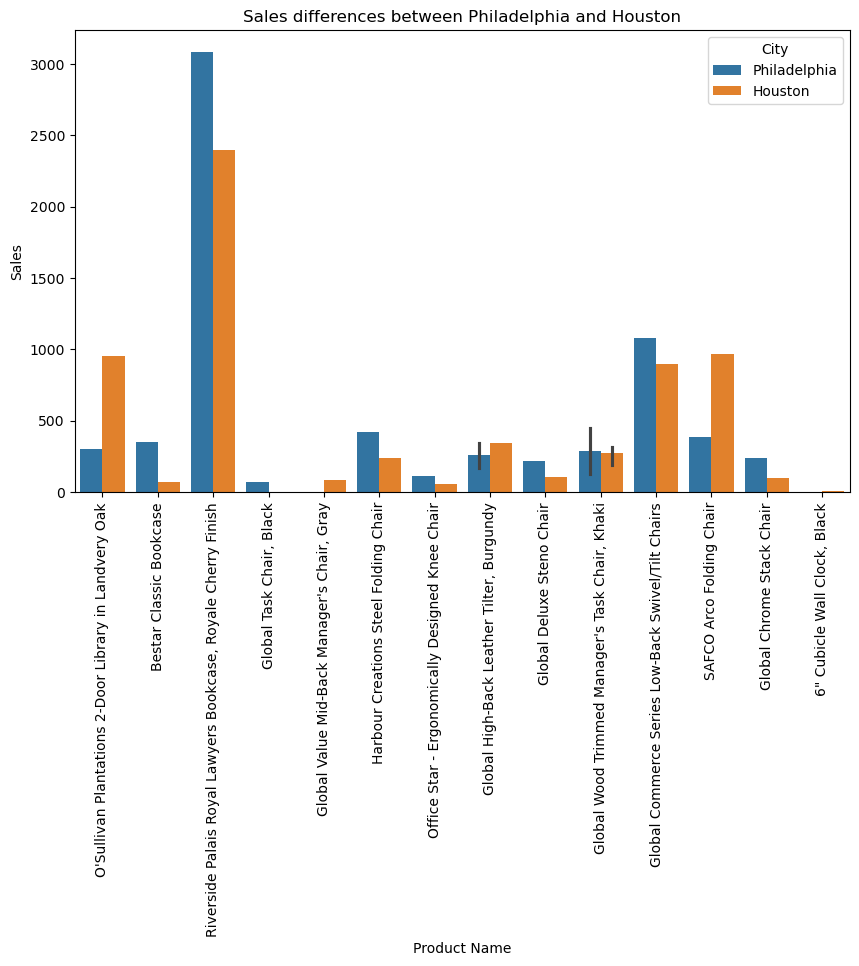

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=result_to_plot['Product Name'],y= result_to_plot['Sales'], hue=result_to_plot["City"])
plt.xticks(rotation=90, fontsize=10)
plt.title('Sales differences between Philadelphia and Houston')
plt.show()

From a sample of 14 products, it seems the Texas prices are usually lower than those of most cities including Philadelphia. We will use this information to accept the price of the Hoover Replacement belt in Texas and since we do not have many entries of this product we will assume it was cleared off at a low price and consider it valid for our analysis.

#### Category

In [27]:
data.Category.nunique()

3

In [28]:
cat=data.Category.value_counts().reset_index()
cat

,Category,count
0,Office Supplies,5909
1,Furniture,2078
2,Technology,1813


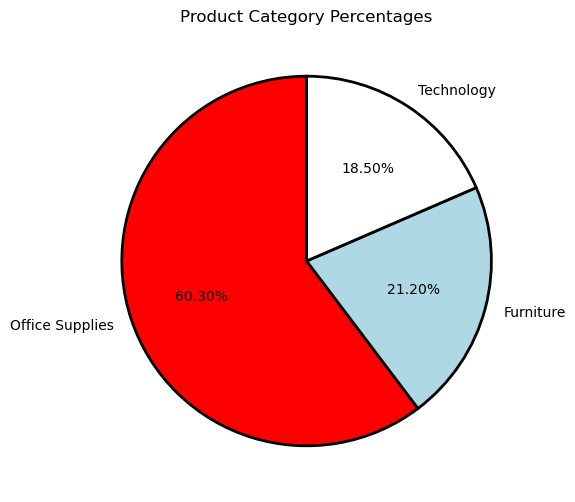

In [29]:
plt.figure(figsize=(10,6))
colors=['red', '#ADD8E4', 'white' ]
plt.pie(cat['count'],labels=cat['Category'], autopct='%1.2f%%', startangle=90, colors=colors, 
        wedgeprops=dict(edgecolor='black', linewidth=2))
plt.title('Product Category Percentages')
plt.show()

#### Number of sold items per Category and sub-category

In [30]:
data['Sub-Category'].nunique()

17

In [31]:
data['Sub-Category'].value_counts()

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: count, dtype: int64

In [32]:
sub_cat=data.groupby('Category')['Sub-Category'].value_counts().reset_index()
sub_cat

,Category,Sub-Category,count
0,Furniture,Furnishings,931
1,Furniture,Chairs,607
2,Furniture,Tables,314
3,Furniture,Bookcases,226
4,Office Supplies,Binders,1492
5,Office Supplies,Paper,1338
6,Office Supplies,Storage,832
7,Office Supplies,Art,785
8,Office Supplies,Appliances,459
9,Office Supplies,Labels,357


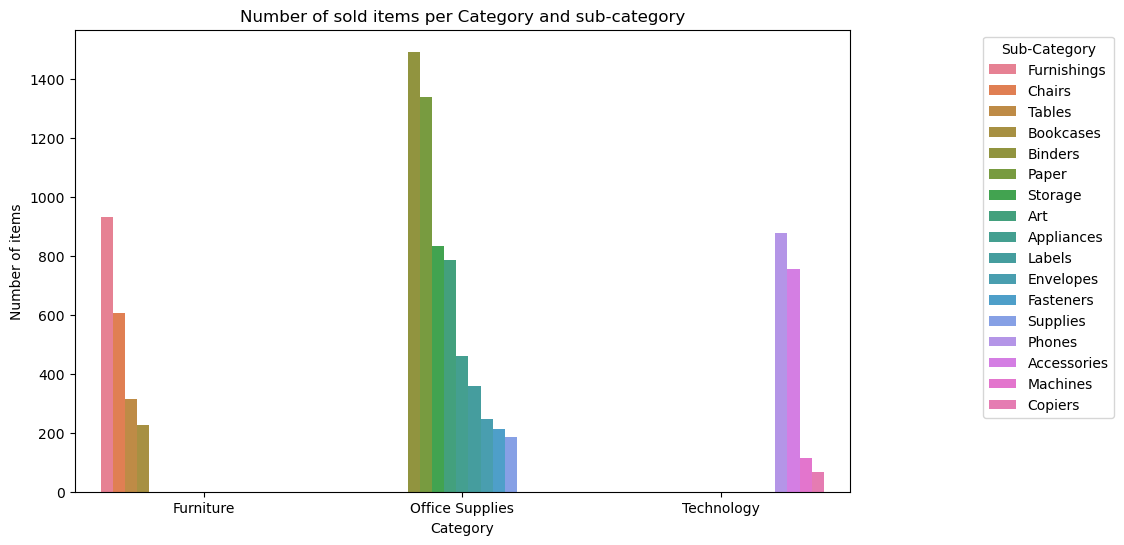

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(data=sub_cat, x='Category', y='count', hue='Sub-Category')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.35,1), loc='upper right')
plt.title('Number of sold items per Category and sub-category')
plt.ylabel('Number of items')
plt.show()

#### Sales per Category

In [34]:
cat_sales=data.groupby('Category')['Sales'].sum().reset_index()
cat_sales  #group data by category and find the sales per category

,Category,Sales
0,Furniture,728658.5757
1,Office Supplies,705422.3340
2,Technology,827455.8730


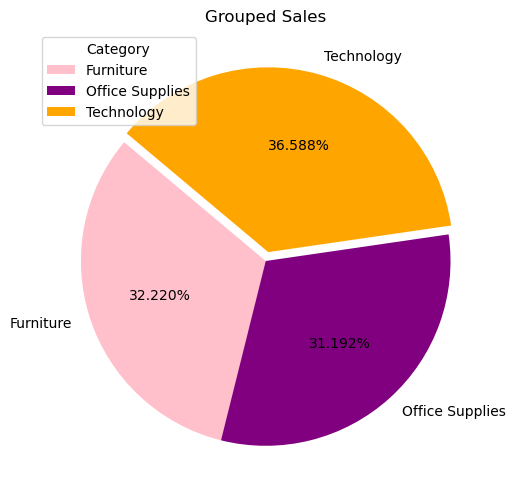

In [35]:
plt.figure(figsize=(10,6))
colors=['pink','purple','orange']
plt.pie(cat_sales['Sales'], labels=cat_sales['Category'], autopct='%1.3f%%', startangle=140,explode=[0,0,0.05], colors=colors)
plt.title('Grouped Sales')
plt.legend(cat_sales['Category'], title='Category', loc='upper left')
plt.show() # plot pie chart

Although Technology has a higher contribution to the total sales, it seems the three categories contribute fairly equaly to the revenue of the company.

#### Cities with top sales

In [36]:
data.City.nunique() #find the number of unique cities in data set

529

In [37]:
Top_10_cities=data.groupby('City').Sales.sum().reset_index().sort_values(by='Sales', ascending=False).head(10)
Top_10_cities #find the top 10  cities in sales

,City,Sales
327,New York City,252462.5470
265,Los Angeles,173420.1810
450,Seattle,116106.3220
436,San Francisco,109041.1200
372,Philadelphia,108841.7490
207,Houston,63956.1428
80,Chicago,47820.1330
435,San Diego,47521.0290
216,Jacksonville,44713.1830
123,Detroit,42446.9440


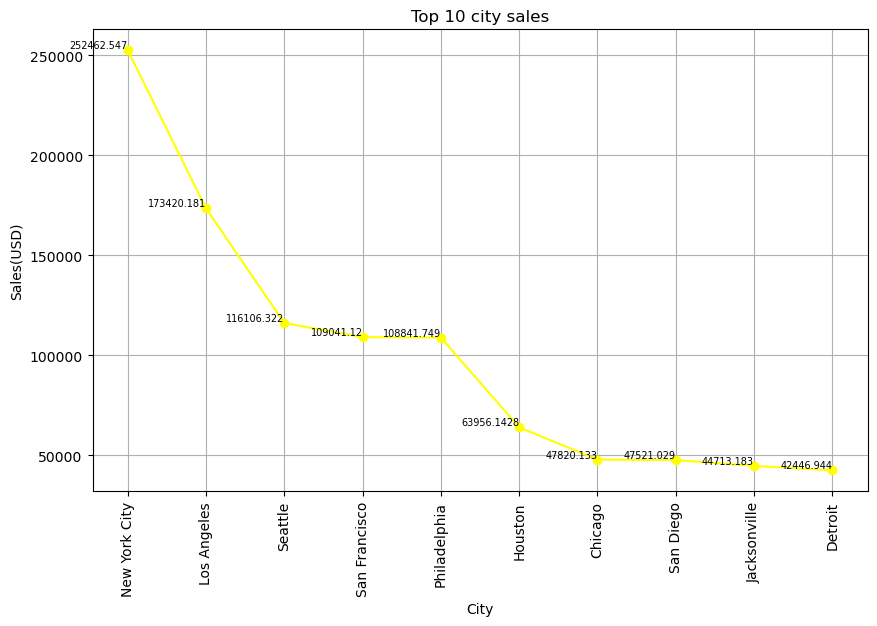

In [38]:
plt.figure(figsize=(10,6))
plt.plot(Top_10_cities['City'], Top_10_cities['Sales'], color='yellow', marker='o')
plt.xticks(rotation=90)
plt.title('Top 10 city sales')
plt.xlabel('City')
plt.ylabel('Sales(USD)')
plt.grid(True)

for i, value in enumerate(Top_10_cities['Sales']):
    plt.text(Top_10_cities['City'].iloc[i], Top_10_cities['Sales'].iloc[i], str(value), fontsize=7, ha='right', va='bottom') 
    # to add exact values on the points

plt.show() # plot line graph

New York City had the highest sales in the period from 2015-2018.

#### Preferred_shipping_mode

In [39]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [40]:
data['Ship Mode'].nunique() #ind number of shipping modes

4

In [41]:
ship_mode= data['Ship Mode'].value_counts().reset_index()
ship_mode #create dataset of number of people who used each shipping mode

,Ship Mode,count
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


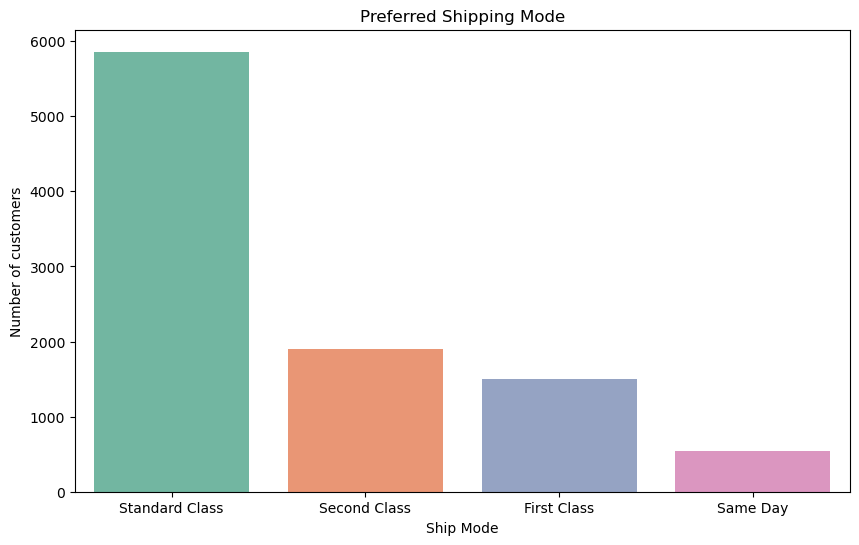

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=ship_mode['Ship Mode'], y=ship_mode['count'], hue=ship_mode['Ship Mode'], palette='Set2')
plt.title('Preferred Shipping Mode')
plt.ylabel('Number of customers')
plt.show() #plot bar graph


We can see that most people used the Standard Class shipping mode. This is most probably the cheapest option.

### Conclusion

This exploratory data analysis provided valuable insights into the retail sales data across various cities and product categories. The key findings are:

Pricing trends: While New York City had the highest overall sales, Houston exhibited lower pricing for common products compared to other major cities like Philadelphia. This suggests potential opportunities for optimizing pricing strategies in certain markets.

Category performance: The top 3 categories by sales - Technology, Furniture, and Office Supplies - contributed fairly equally to the company's revenue. This relatively balanced performance indicates the importance of maintaining a diverse product portfolio to drive consistent growth.

Customer preferences: Standard Class was the most popular shipping mode, likely due to its lower cost. Understanding customer preferences for shipping can inform decisions around offering competitive delivery options.

Data limitations: The dataset had missing postal codes for some locations, which were imputed using the most common zip code. This may introduce some bias in the analysis of sales by geographic area. Additionally, the data only covers a limited time period from 2015-2018, so seasonal or year-over-year trends could not be fully assessed.

In summary, this analysis provides a high-level view of the company's sales performance and customer behavior. The insights can inform strategic decisions around pricing, product mix, and customer experience. However, further analysis is needed to validate the findings, account for data limitations, and explore additional factors impacting sales. Recommendations for future research include:

-Conducting a more comprehensive analysis over a longer time horizon to identify seasonal and annual trends
-Performing a detailed review of pricing strategies and their impact on sales in different markets
-Gathering additional data on customer demographics and preferences to enable more targeted marketing and product recommendations

By building on the findings from this initial EDA, the company can continue to optimize its operations and drive growth in a competitive retail landscape.



.